In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [174]:
cosmetics = pd.read_csv("cosmetics.csv")

/Users/akhileshpandita/AnacondaParentFolder/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
#Removing extra header columns that have crept in data because of merging
headerIndex = cosmetics[cosmetics['event_time']=='event_time'].index.tolist()

In [176]:
cosmetics.drop(headerIndex,inplace=True)

In [184]:
shoppers = cosmetics

In [185]:
#Getting a sense of data
shoppers.info()
shoppers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20692840 entries, 0 to 20692843
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       object
category_id      object
category_code    object
brand            object
price            object
user_id          object
user_session     object
dtypes: object(9)
memory usage: 1.5+ GB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [186]:
#Changing data type of approproate columns
shoppers["price"] = pd.to_numeric(shoppers["price"])

In [187]:
shoppers['event_time']

0           2019-12-01 00:00:00 UTC
1           2019-12-01 00:00:00 UTC
2           2019-12-01 00:00:02 UTC
3           2019-12-01 00:00:05 UTC
4           2019-12-01 00:00:07 UTC
                     ...           
20692839    2020-01-31 23:59:52 UTC
20692840    2020-01-31 23:59:52 UTC
20692841    2020-01-31 23:59:53 UTC
20692842    2020-01-31 23:59:57 UTC
20692843    2020-01-31 23:59:58 UTC
Name: event_time, Length: 20692840, dtype: object

In [188]:
shoppers['event_time'] = shoppers['event_time'].apply(lambda x: x[:19])

In [189]:
shoppers['event_time']= pd.to_datetime(shoppers['event_time']) 

In [21]:
# Getting Unique Values
#events = shoppers['event_type'].unique()

In [22]:
#brands = shoppers['category_code'].unique()

In [23]:
#categoryCodes = shoppers['category_code'].unique()

In [190]:
#Removing the category_code column
shoppers.drop('category_code',axis=1,inplace=True)

In [191]:
#shoppers = shoppers.dropna()
shoppers.count()

event_time      20692840
event_type      20692840
product_id      20692840
category_id     20692840
brand           11935723
price           20692840
user_id         20692840
user_session    20688242
dtype: int64

In [192]:
shoppers['year'] = pd.DatetimeIndex(shoppers['event_time']).year
shoppers['month'] = pd.DatetimeIndex(shoppers['event_time']).month
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
shoppers['weekday'] = pd.DatetimeIndex(shoppers['event_time']).weekday.map(dayOfWeek)

In [193]:
shoppers['hour'] = pd.DatetimeIndex(shoppers['event_time']).hour

In [194]:
shoppers["product_id"] = pd.to_numeric(shoppers["product_id"])
shoppers["category_id"] = pd.to_numeric(shoppers["category_id"])
shoppers["user_id"] = pd.to_numeric(shoppers["user_id"])

In [195]:
shoppers['event_type']= shoppers['event_type'].astype(str)
shoppers['brand']= shoppers['brand'].astype(str)

In [196]:
#Pickling our data for faster access
shoppers.to_pickle("shoppers.pkl")

In [132]:
#Retreiving pickled data
shoppers = pd.read_pickle("shoppers.pkl")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11932754 entries, 0 to 20692838
Data columns (total 12 columns):
event_time      datetime64[ns]
event_type      object
product_id      int64
category_id     int64
brand           object
price           float64
user_id         int64
user_session    object
year            int64
month           int64
weekday         object
hour            int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1.5+ GB


In [197]:
shoppers.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,Sunday,0
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,Sunday,0
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,Sunday,0
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,Sunday,0
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,Sunday,0


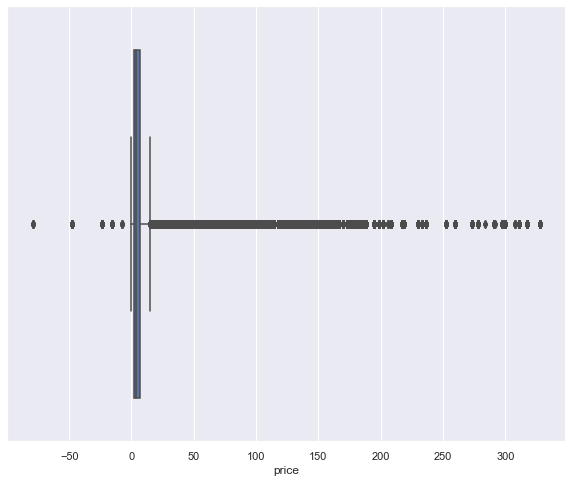

In [321]:
#Checking Price distribution
sns.boxplot(x=shoppers["price"])

# 1. Most prices are between 0 and 8 (75%)
# 2. Overall prices vary between 0 to 350, prices above 150 are very rare

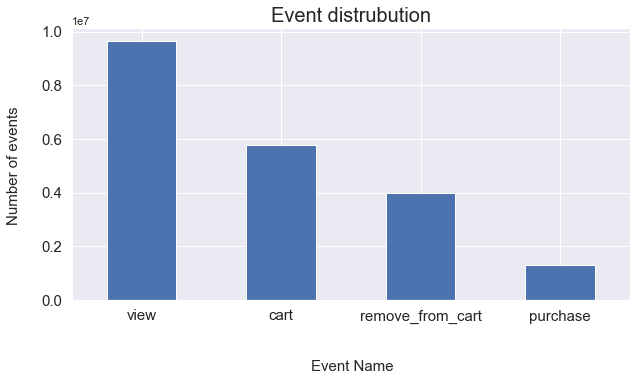

In [199]:
# Event distribution Histogram
shoppers.event_type.value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Event distrubution",size=20)
plt.ylabel("Number of events \n ",size=15)
plt.xlabel("\n \n Event Name",size=15)
plt.xticks(size= 15,rotation = 0)
plt.yticks(size= 15)
plt.show()

# 1. Most events are view events
# 2. There are very few purchase events

In [121]:
# # Product distribution Histogram
# shoppers.product_id.value_counts().plot(kind="bar", figsize=(10,5),color ='green')
# plt.title("Product distrubution",size=20)
# plt.ylabel("Number of events\n ",size=15)
# plt.xlabel("\n \n Product ID", size=15)
# plt.xticks(rotation = 0,size= 15)
# plt.yticks(size= 15)
# plt.show()

In [151]:
# # Checking the relationship between price and purchase
# # Plotting a scatter plot

# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(shoppers["event_type"], shoppers["price"])
# ax.set_title("Event v/s Price distribution", size=15)
# ax.set_xlabel("\n \n Event Type", size=15)
# ax.set_ylabel("Price \n", size=15)
# plt.show()

In [242]:
shoppers.describe()

,product_id,category_id,price,user_id,year,month,hour
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08,2.019407e+03,7.103645e+00,1.308708e+01
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07,4.912698e-01,4.697671e+00,5.478420e+00
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05,2.019000e+03,1.000000e+00,0.000000e+00
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08,2.019000e+03,2.000000e+00,9.000000e+00
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08,2.019000e+03,1.000000e+01,1.300000e+01
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08,2.020000e+03,1.100000e+01,1.800000e+01
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08,2.020000e+03,1.200000e+01,2.300000e+01


In [ ]:
shoppers

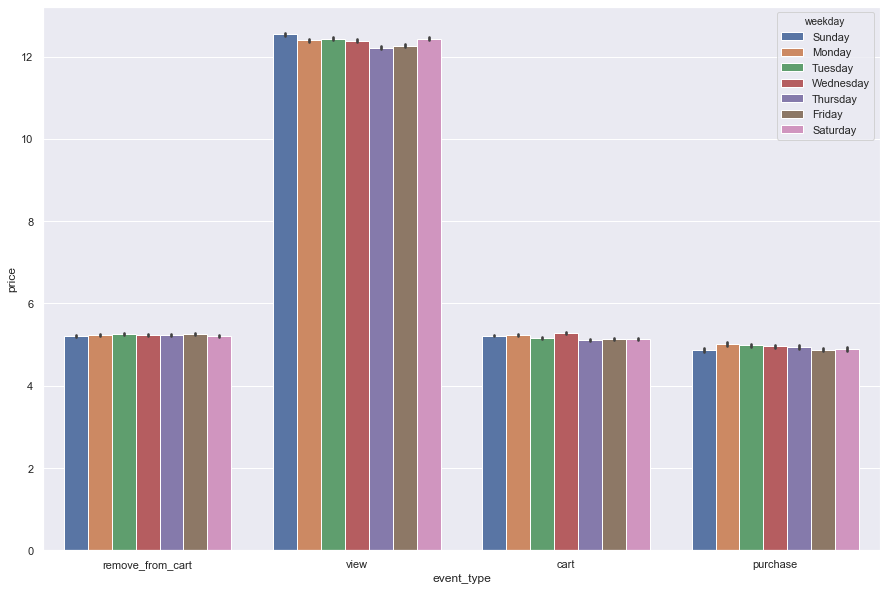

In [200]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='event_type',y='price',data=shoppers, hue='weekday')

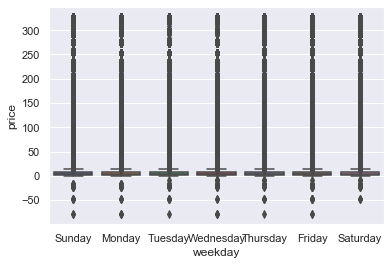

In [240]:
sns.boxplot(data=shoppers, x='weekday', y='price')

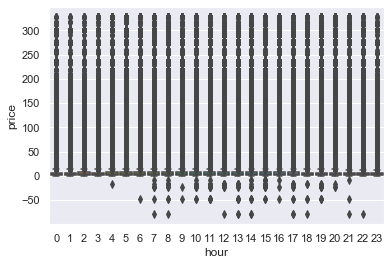

In [241]:
sns.boxplot(data=shoppers, x='hour', y='price')

In [249]:
shoppers.loc[(shoppers['price']<=0),['user_id','event_type','user_session','product_id']].groupby('event_type').count()

,user_id,user_session,product_id
event_type,,,
cart,49370,49369,49370
purchase,127,127,127
remove_from_cart,24299,24299,24299
view,30492,30492,30492


In [251]:
shoppers.loc[(shoppers['price']<0),['user_id','event_type','user_session','product_id']].groupby('event_type').count()

,user_id,user_session,product_id
event_type,,,
purchase,126,126,126
remove_from_cart,3,3,3
view,2,2,2


# 1.  People view items of broad price range but purchase and add to cart of a smaller range i.e. low to mid
# 2.  Purchases don't vary much by the day of week

In [319]:
viewByHour = shoppers.loc[shoppers['event_type']=='purchase','hour']

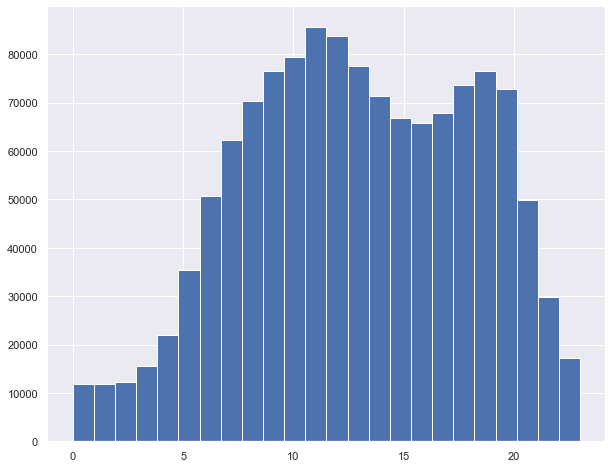

In [320]:
viewByHour.hist(bins=24)

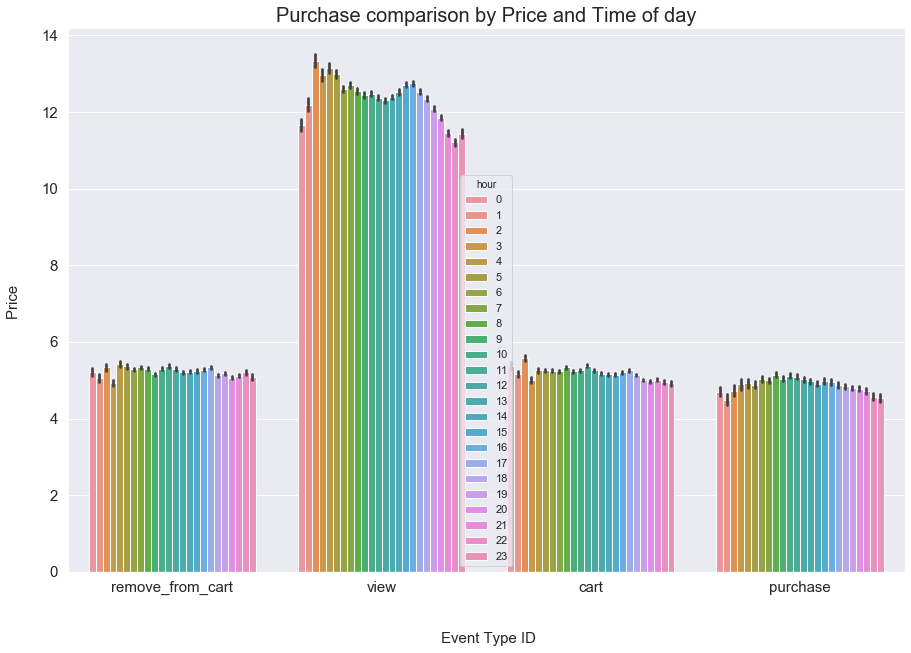

In [201]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='event_type',y='price',data=shoppers, hue='hour')
plt.title("Purchase comparison by Price and Time of day",size=20)
plt.ylabel("Price \n ",size=15)
plt.xlabel("\n \n Event Type ID", size=15)
plt.xticks(rotation = 0,size= 15)
plt.yticks(size= 15)
plt.show()

# Not much variance by time of day as well
# Slight peak in items being viewed around 2 AM UTC i.e. 10 PM Eastern (if the data is US data)

In [203]:
totalSessions = shoppers.groupby('user_id')[['user_session']].count()
totalSessions = totalSessions.rename(columns={'user_session':'total_sessions'})
totalSessions.head()

,total_sessions
user_id,
465496,3
1120748,1
1180452,1
1458813,31
2038666,1


In [204]:
purchaseSessions = shoppers[shoppers['event_type']=='purchase'].groupby('user_id')[['user_session']].count()
purchaseSessions = purchaseSessions.rename(columns={'user_session':'purchase_sessions'})
purchaseSessions.head()

,purchase_sessions
user_id,
9794320,4
10079204,2
10280338,86
12055855,4
12936739,2


In [205]:
cartSessions = shoppers[shoppers['event_type']=='cart'].groupby('user_id')[['user_session']].count()
cartSessions = cartSessions.rename(columns={'user_session':'cart_sessions'})
cartSessions.head()

,cart_sessions
user_id,
2963072,7
4103071,1
4661182,2
5493470,5
6217356,2


In [206]:
removeSessions = shoppers[shoppers['event_type']=='remove_from_cart'].groupby('user_id')[['user_session']].count()
removeSessions = removeSessions.rename(columns={'user_session':'remove_sessions'})
removeSessions.head()

,remove_sessions
user_id,
4661182,3
8846226,16
9794320,35
10280338,120
12961898,15


In [207]:
viewSessions = shoppers[shoppers['event_type']=='view'].groupby('user_id')[['user_session']].count()
viewSessions = viewSessions.rename(columns={'user_session':'view_sessions'})
viewSessions.head()

,view_sessions
user_id,
465496,3
1120748,1
1180452,1
1458813,31
2038666,1


In [208]:
m1 = pd.merge(totalSessions,purchaseSessions, on='user_id', how='outer')
m2 = pd.merge(m1, cartSessions, on='user_id', how='outer')
m3 = pd.merge(m2, removeSessions, on='user_id', how='outer')
merged = pd.merge(m3, viewSessions, on='user_id', how='outer')
merged = merged.fillna(0).sort_values(by='purchase_sessions',ascending=False)
merged.head(10)

,total_sessions,purchase_sessions,cart_sessions,remove_sessions,view_sessions
user_id,,,,,
480463194,2364,715.0,1330.0,256.0,63.0
469299888,3370,603.0,1707.0,703.0,357.0
556579890,1283,506.0,390.0,299.0,88.0
381816972,1730,500.0,797.0,376.0,57.0
601469771,1522,461.0,857.0,93.0,111.0
557790271,1946,438.0,844.0,381.0,283.0
473313149,1344,417.0,784.0,81.0,62.0
517825140,1984,412.0,915.0,532.0,125.0
566439116,1872,409.0,845.0,466.0,152.0


In [413]:
# merged['purchaseRatio']= merged['purchase_sessions']*100/merged['total_sessions']
# merged['cartRatio']= merged['cart_sessions']*100/merged['total_sessions']
# merged['removeRatio']= merged['remove_sessions']*100/merged['total_sessions']
# merged['viewRatio']= merged['view_sessions']*100/merged['total_sessions']

In [419]:
# merged.drop(['total_sessions','purchase_sessions','cart_sessions','remove_sessions','view_sessions'],axis=1,inplace=True)

# Inferences:


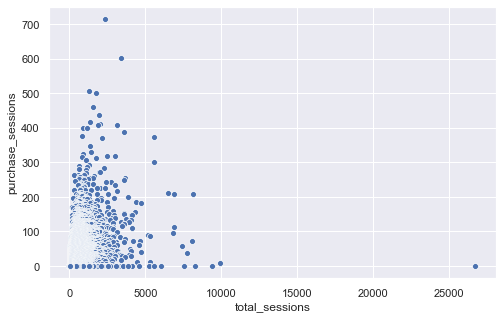

In [209]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["purchase_sessions"])

# 1. Uptil a certain point purchases slightly increase with total number sessions but there is not a clear linear relationship

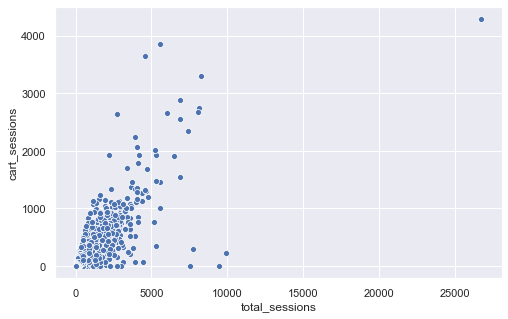

In [210]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["cart_sessions"])
plt.show()

# 2. Cart sessions generally tend to increase with more sessions

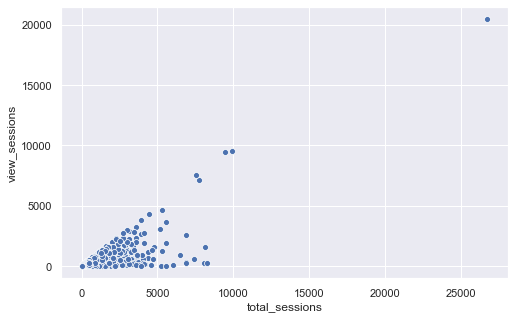

In [211]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["view_sessions"])
plt.show()

# 3. As Total sessions increase view sessions also tend to increase

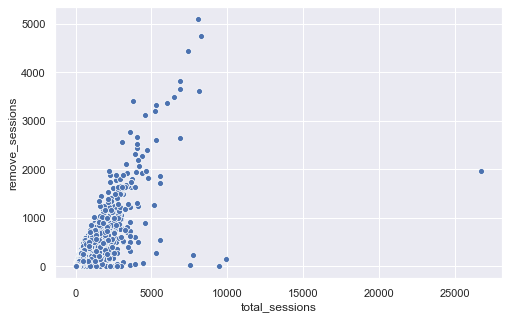

In [212]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["total_sessions"], merged["remove_sessions"])
plt.show()

# 4. As Total Sessions increase, the remove sessions tend to rapidly increase uptil a point

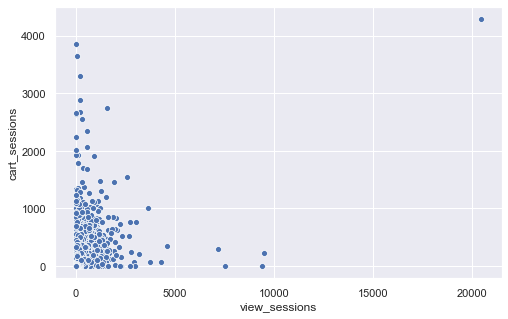

In [213]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["view_sessions"], merged["cart_sessions"])
plt.show()

# 5. Number of view sessions and Number of Cart Sessions dont have a linear relationship
# In fact, the number of cart sessions are highest when people have lesser view sessions. This could be indicative of immediate purchase decisions

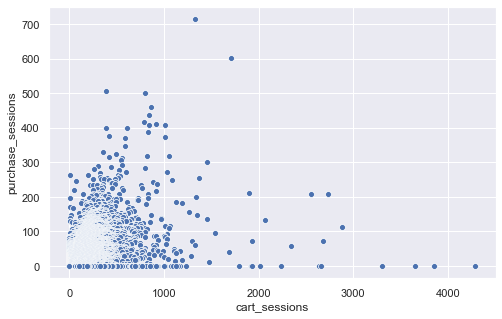

In [278]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["cart_sessions"], merged["purchase_sessions"])
plt.show()

# 6. As number of cart sessions increase the purchases only increase uptil a certain point, beyond which it starts to flatten and then even decrease i.e. indicating cart abandonment

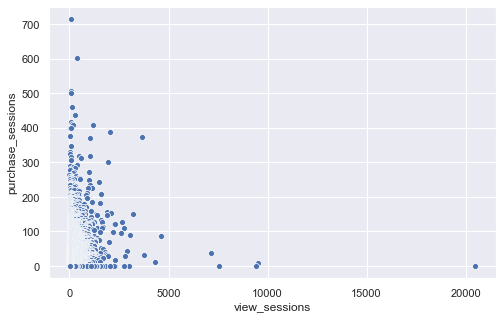

In [215]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(merged["view_sessions"], merged["purchase_sessions"])
plt.show()

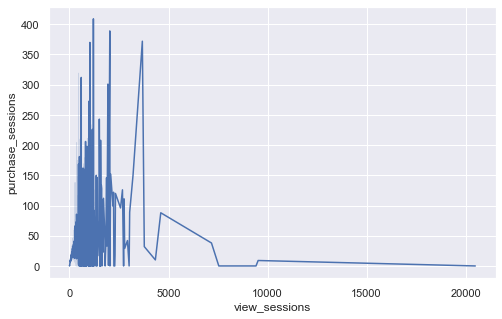

In [295]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(merged["view_sessions"], merged["purchase_sessions"])
plt.show()

# 5. Again Number of view sessions and Number of Purchase Sessions show the same relationship as Number of view and Number of Cart sessions.

# The number of purchase sessions are highest when people have lesser view sessions. Again could be indicative of immediate purchase decisions

### Duration vs Purchase

In [216]:
def ammd(series):
    return max(series) - min(series)

In [217]:
sessionDF = shoppers.groupby("user_session").count()

In [218]:
sessionDuration = (shoppers.groupby('user_session').agg(ammd)[['event_time']])
sessionDuration.rename(columns={'event_time':'Duration'},inplace=True)

In [219]:
userSsnDuration = pd.merge(sessionDF,sessionDuration,on='user_session',how='outer')
userSsnDuration.drop(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)

In [220]:
userSsnDuration.head()

,Duration
user_session,
0000061d-f3e9-484b-8c73-e54f355032a3,00:00:00
00000ac8-0015-4f12-996a-be2896323738,00:00:00
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,00:00:00
000013d6-68a4-40cf-9452-6577dbfab515,02:04:43
00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,00:12:36


In [221]:
purchaseDF = shoppers[shoppers['event_type']=='purchase'].groupby('user_session').count()
purchaseDF.drop(['event_type', 'product_id', 'price','category_id', 'brand', 'user_id', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)
purchaseDF = purchaseDF.rename(columns={'event_time':'purchases'})

In [222]:
PurchaseTime = pd.merge(userSsnDuration,purchaseDF,on='user_session',how='outer').fillna(0.0)
PurchaseTime['Duration'] = PurchaseTime['Duration'].apply(lambda x: pd.Timedelta.total_seconds(x) )
PurchaseTime = PurchaseTime.sort_values(by='Duration',ascending=False)

In [223]:
priceDF = shoppers[shoppers['event_type']=='purchase'].groupby('user_session')['price'].sum()

In [311]:
PurchasePriceTime['Duration'].describe()

count    4.535941e+06
mean     1.541388e+04
std      3.092551e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.300000e+01
max      1.309956e+07
Name: Duration, dtype: float64

(array([4.525387e+06, 2.835000e+03, 1.296000e+03, 1.130000e+03,
        1.040000e+03, 1.572000e+03, 1.076000e+03, 7.380000e+02,
        5.490000e+02, 3.180000e+02]),
 array([       0. ,  1309955.6,  2619911.2,  3929866.8,  5239822.4,
         6549778. ,  7859733.6,  9169689.2, 10479644.8, 11789600.4,
        13099556. ]),
 <a list of 10 Patch objects>)

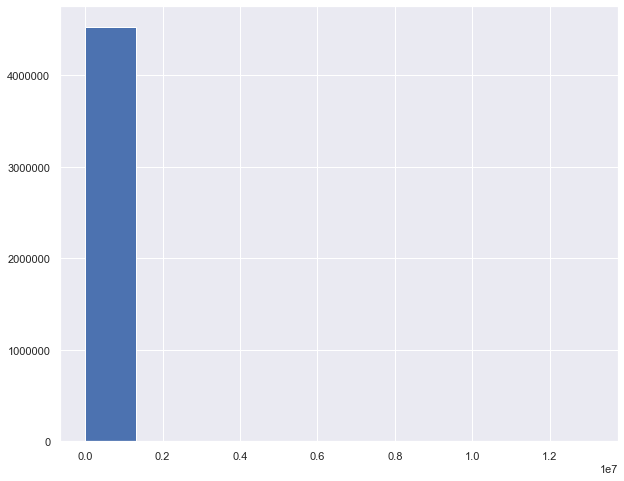

In [312]:
sns.lineplot(PurchasePriceTime['Duration'])

In [224]:
PurchasePriceTime = pd.merge(PurchaseTime,priceDF,on='user_session',how='outer').fillna(0.0)
PurchasePriceTime

,Duration,purchases,price
user_session,,,
ae74cec4-ae31-4470-8484-84c3a75365d3,13099556.0,43.0,266.49
beac319a-88e8-43db-98e9-d6cd6184f444,13086649.0,36.0,91.16
099fefe4-a74c-4dae-b9c2-fe15dea34ff1,13084778.0,105.0,485.40
5b9bcf07-5c80-4f98-84dd-cad0883e0477,13081247.0,25.0,121.35
285e8547-29b3-49d2-b503-5ca9a60413cc,13067259.0,127.0,1738.10
...,...,...,...
7374851d-a52d-442f-a360-8c99186c4d6c,0.0,0.0,0.00
73748d95-1086-4f36-b5c3-d2b1ccefa109,0.0,0.0,0.00
7374910b-6f7c-4392-81c1-f34c7e2a3d25,0.0,0.0,0.00


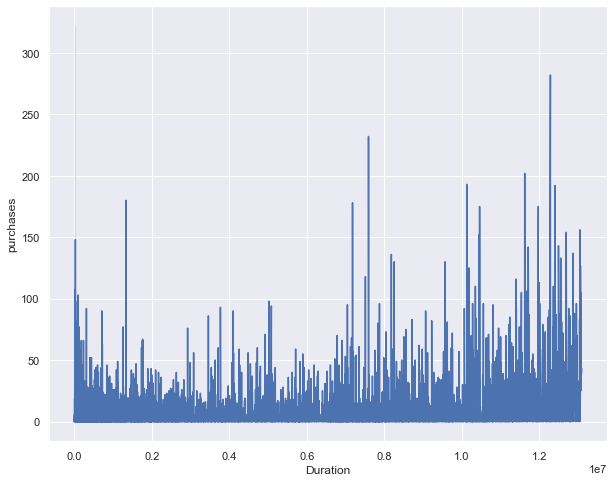

In [298]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x='Duration', y='purchases', data=PurchasePriceTime)
plt.show()

# While sessions higher than 1 sec can be in general attributed to more purchases, purchases do dip after a point and a good number of high purchases are seen even with lower duration sessions(immediate purchases)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.relplot(x='Duration', y='purchases', hue = 'price', kind = line , data=PurchasePriceTime)
plt.show()

# By brand, product_id and category_id

In [225]:
shoppers.loc[(shoppers['event_type']=='purchase'),['product_id','category_id','brand']].groupby('brand').count().sort_values(by='product_id',ascending=False)

,product_id,category_id
brand,,
nan,549693,549693
runail,111408,111408
irisk,73806,73806
masura,49751,49751
grattol,49542,49542
...,...,...
sun,2,2
bosnic,1,1
lunaris,1,1


In [226]:
shoppers.loc[(shoppers['event_type']=='purchase'),['product_id','category_id','brand']].groupby('category_id').count().sort_values(by='product_id',ascending=False)

,product_id,brand
category_id,,
1487580007675986893,80137,80137
1487580006317032337,50555,50555
1487580005092295511,44870,44870
1487580005595612013,44334,44334
1487580005671109489,43452,43452
...,...,...
1752742617696698537,1,1
1487580013564788937,1,1
1487580008951054345,1,1


In [227]:
shoppers.loc[(shoppers['event_type']=='purchase'),['product_id','category_id','brand']].groupby('product_id').count().sort_values(by='category_id',ascending=False)

,category_id,brand
product_id,,
5809910,7549,7549
5854897,4631,4631
5700037,3684,3684
5802432,3533,3533
5751422,3521,3521
...,...,...
5901797,1,1
5901795,1,1
5901794,1,1


### Relationship between number of sessions and number of purchases 

In [228]:
PurchasePerSession = shoppers[shoppers['event_type']=='purchase'].groupby(['user_id','user_session']).count()#.sort_values(by='product_id')
PurchasePerSession

event_time  event_type  \
user_id   user_session                                                   
9794320   30d70cc3-86ee-4b5d-879c-40f06132163c           4           4   
10079204  f873d16b-4efa-4e92-81be-92948aef2ff5           2           2   
10280338  5a8ef64a-9215-4c88-ad5f-b3bab4e03fb3          47          47   
          9728269f-2014-4d85-a95a-0dab99c4851e          22          22   
          bcc9bfa0-8a71-485d-b315-297b0038b4c2          10          10   
...                                                    ...         ...   
622065819 a6c280be-ad01-413d-818e-a818f3ac3558           4           4   
622066161 389680bd-69c6-4364-b549-651f82f8ffce           4           4   
622067983 93a3b8e4-f726-4cdc-8d18-12d4c6f23b59          10          10   
622069477 8d85bde1-9586-4a39-a8ed-ecc59ea083a0           1           1   
622073202 b16a9260-1eaa-48de-87a3-dbad3d75eba3           1           1   

                                                product_id  category_id  \
user_id   user_session                                                    
9794320   30d70cc3-86ee-4b5d-879c-40f06132163c           4            4   
10079204  f873d16b-4efa-4e92-81be-92948aef2ff5           2            2   
10280338  5a8ef64a-9215-4c88-ad5f-b3bab4e03fb3          47           47   
          9728269f-2014-4d85-a95a-0dab99c4851e          22           22   
          bcc9bfa0-8a71-485d-b315-297b0038b4c2          10           10   
...                                                    ...          ...   
622065819 a6c280be-ad01-413d-818e-a818f3ac3558           4            4   
622066161 389680bd-69c6-4364-b549-651f82f8ffce           4            4   
622067983 93a3b8e4-f726-4cdc-8d18-12d4c6f23b59          10           10   
622069477 8d85bde1-9586-4a39-a8ed-ecc59ea083a0           1            1   
622073202 b16a9260-1eaa-48de-87a3-dbad3d75eba3           1            1   

                                                brand  price  year  month  \
user_id   user_session                                                      
9794320   30d70cc3-86ee-4b5d-879c-40f06132163c      4      4     4      4   
10079204  f873d16b-4efa-4e92-81be-92948aef2ff5      2      2     2      2   
10280338  5a8ef64a-9215-4c88-ad5f-b3bab4e03fb3     47     47    47     47   
          9728269f-2014-4d85-a95a-0dab99c4851e     22     22    22     22   
          bcc9bfa0-8a71-485d-b315-297b0038b4c2     10     10    10     10   
...                                               ...    ...   ...    ...   
622065819 a6c280be-ad01-413d-818e-a818f3ac3558      4      4     4      4   
622066161 389680bd-69c6-4364-b549-651f82f8ffce      4      4     4      4   
622067983 93a3b8e4-f726-4cdc-8d18-12d4c6f23b59     10     10    10     10   
622069477 8d85bde1-9586-4a39-a8ed-ecc59ea083a0      1      1     1      1   
622073202 b16a9260-1eaa-48de-87a3-dbad3d75eba3      1      1     1      1   

                                                weekday  hour  
user_id   user_session                                         
9794320   30d70cc3-86ee-4b5d-879c-40f06132163c        4     4  
10079204  f873d16b-4efa-4e92-81be-92948aef2ff5        2     2  
10280338  5a8ef64a-9215-4c88-ad5f-b3bab4e03fb3       47    47  
          9728269f-2014-4d85-a95a-0dab99c4851e       22    22  
          bcc9bfa0-8a71-485d-b315-297b0038b4c2       10    10  
...                                                 ...   ...  
622065819 a6c280be-ad01-413d-818e-a818f3ac3558        4     4  
622066161 389680bd-69c6-4364-b549-651f82f8ffce        4     4  
622067983 93a3b8e4-f726-4cdc-8d18-12d4c6f23b59       10    10  
622069477 8d85bde1-9586-4a39-a8ed-ecc59ea083a0        1     1  
622073202 b16a9260-1eaa-48de-87a3-dbad3d75eba3        1     1  

[155617 rows x 10 columns]

In [229]:
TotalPurchases = shoppers[shoppers['event_type']=='purchase'].groupby(['user_id']).count()
TotalPurchases.drop([ 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_session', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)
TotalPurchases.rename(columns={'event_time':'Total_Purchases_Made'},inplace=True)
TotalPurchases

,Total_Purchases_Made
user_id,
9794320,4
10079204,2
10280338,86
12055855,4
12936739,2
...,...
622065819,4
622066161,4
622067983,10


In [230]:
NumSessions = PurchasePerSession.groupby(['user_id']).count()
NumSessions.drop([ 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'year', 'month', 'weekday', 'hour'],axis=1,inplace=True)
NumSessions.rename(columns={'event_time':'Purchase_Sessions'},inplace=True)

In [231]:
SessionPurchaseRatio= pd.merge(NumSessions,TotalPurchases,on='user_id',how='outer')
SessionPurchaseRatio = SessionPurchaseRatio.sort_values(by='Purchase_Sessions',ascending=False)
SessionPurchaseRatio

,Purchase_Sessions,Total_Purchases_Made
user_id,,
150318419,122,370
471197852,75,389
247216055,73,409
531900924,72,372
549464624,72,232
...,...,...
545710867,1,6
545708921,1,3
545704739,1,16


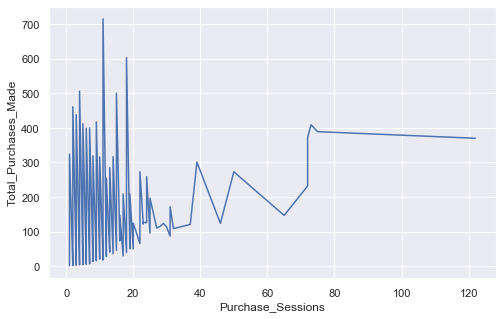

In [233]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Purchase_Sessions', y='Total_Purchases_Made', data=SessionPurchaseRatio,estimator=None)
plt.show()

# If number of purchase sessions of a user increases from 0 to 10, generally the total number of products he has purchased will increase i.e. People with more purchase sessions will tend to purchase more things given number of sessions are between 0 and 15
# Beyond that the data is fractured i.e. its not necessary that if purchases go above 15, the total items purchased will increase, in a broader sense people could purchase more items in lesser sessions

In [234]:
shoppers.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
0,2019-12-01 00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,Sunday,0
1,2019-12-01 00:00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,Sunday,0
2,2019-12-01 00:00:02,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,Sunday,0
3,2019-12-01 00:00:05,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,Sunday,0
4,2019-12-01 00:00:07,view,5824148,1487580005511725929,nan,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,Sunday,0


In [235]:
cartData = shoppers.loc[shoppers['event_type']=='cart',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
cartData = cartData.groupby('product_id').count()
cartData = cartData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumCart"})
cartData

,NumCart
product_id,
3762,1248
3763,83
3774,246
3776,39
3806,238
...,...
5932580,1
5932581,2
5932582,3


In [236]:
purchaseData = shoppers.loc[shoppers['event_type']=='purchase',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
purchaseData = purchaseData.groupby('product_id').count()
purchaseData = purchaseData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumPurchase"})
purchaseData

,NumPurchase
product_id,
3762,294
3763,16
3774,68
3776,7
3806,22
...,...
5932521,2
5932532,1
5932536,1


In [237]:
removeData = shoppers.loc[shoppers['event_type']=='remove_from_cart',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
removeData = removeData.groupby('product_id').count()
removeData = removeData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumRemove"})
removeData

,NumRemove
product_id,
3762,665
3763,54
3774,144
3776,36
3790,1
...,...
5932562,5
5932576,2
5932578,4


In [238]:
viewData = shoppers.loc[shoppers['event_type']=='view',['event_time','product_id','user_id','brand']].sort_values(by='user_id')
viewData = viewData.groupby('product_id').count()
viewData = viewData.drop(["event_time","user_id"],axis=1).rename(columns={"brand":"NumView"})
viewData

,NumView
product_id,
3752,68
3762,2705
3763,353
3771,32
3773,2
...,...
5932582,7
5932583,9
5932584,3


In [252]:
viewCart = pd.merge(viewData,cartData,on="product_id",how="outer")
removeViewCart = pd.merge(viewCart,removeData,on="product_id",how="outer")
OverallProduct = pd.merge(removeViewCart,purchaseData,on="product_id",how="outer")
OverallProduct = OverallProduct.fillna(0.0).sort_values(by="NumView",ascending=False)


In [253]:
OverallProduct

,NumView,NumCart,NumRemove,NumPurchase
product_id,,,,
5809910,93524.0,28102.0,12475.0,7549.0
5809912,30365.0,13390.0,8544.0,3307.0
5877454,25409.0,2707.0,1562.0,615.0
5751383,23527.0,10580.0,6062.0,2948.0
5877456,22393.0,784.0,571.0,67.0
...,...,...,...,...
5836464,0.0,1.0,0.0,0.0
5837769,0.0,3.0,0.0,0.0
5837795,0.0,1.0,0.0,0.0


In [296]:
x =OverallProduct[:10]
x = x.reset_index()

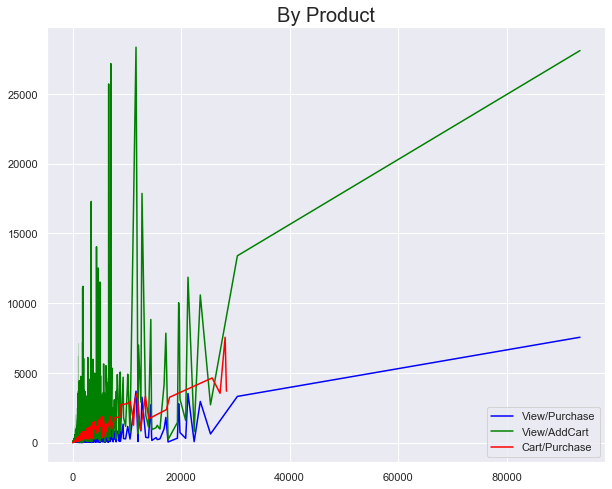

In [297]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.lineplot(OverallProduct['NumView'],OverallProduct['NumPurchase'],color = 'blue', label = 'View/Purchase')
ax =sns.lineplot(OverallProduct['NumView'],OverallProduct['NumCart'],color='green',label='View/AddCart')
ax = sns.lineplot(OverallProduct['NumCart'],OverallProduct['NumPurchase'],color = 'red', label = 'Cart/Purchase')
ax.set(xlabel=None, ylabel=None, title = 'By Product')
ax.set_title("By Product",fontsize=20)
plt.show()

# If we view By Product we see a much stronger relationship between :products being viewed and then purchased


# Somewhat positive correlation between products being added to cart and then purchased

# Not so much of a clear linear relationship between items being viewed and added and then purchased

Checking data for negative prices

In [324]:
#Only one purchase for item with price zero
shoppers[(shoppers['price']==0)&(shoppers['event_type']=='purchase')]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
17926443,2020-01-13 10:24:06,purchase,5911801,1487580005671109489,nan,0.0,562735465,3b8c48f2-b4bd-400e-a786-eace723dbffa,2020,1,Monday,10


In [326]:
Discounts = shoppers[(shoppers['price']<0)&(shoppers['event_type']=='purchase')]

In [329]:
#So different users have purchased
Discounts.groupby("user_id").count().sort_values(by='event_type',ascending = False)

,event_time,event_type,product_id,category_id,brand,price,user_session,year,month,weekday,hour
user_id,,,,,,,,,,,
548835804,4,4,4,4,4,4,4,4,4,4,4
516725846,3,3,3,3,3,3,3,3,3,3,3
475259638,2,2,2,2,2,2,2,2,2,2,2
489184067,2,2,2,2,2,2,2,2,2,2,2
584397095,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
546120591,1,1,1,1,1,1,1,1,1,1,1
544827743,1,1,1,1,1,1,1,1,1,1,1
543647038,1,1,1,1,1,1,1,1,1,1,1


In [330]:
#But a select number of items have been purchased
Discounts.groupby("product_id").count().sort_values(by='event_type',ascending = False)

,event_time,event_type,category_id,brand,price,user_id,user_session,year,month,weekday,hour
product_id,,,,,,,,,,,
5670257,39,39,39,39,39,39,39,39,39,39,39
5716857,34,34,34,34,34,34,34,34,34,34,34
5716859,30,30,30,30,30,30,30,30,30,30,30
5716855,12,12,12,12,12,12,12,12,12,12,12
5716861,11,11,11,11,11,11,11,11,11,11,11


In [331]:
#And only one categroy of items has been brought !!!
Discounts.groupby("category_id").count().sort_values(by='event_type',ascending = False)

,event_time,event_type,product_id,brand,price,user_id,user_session,year,month,weekday,hour
category_id,,,,,,,,,,,
1487580014042939619,126,126,126,126,126,126,126,126,126,126,126


In [333]:
shoppers[(shoppers['price']<0)&(shoppers['event_type']=='purchase')]['category_id'].unique()

array([1487580014042939619])

In [336]:
shoppers[(shoppers['category_id']==1487580014042939619)& (shoppers['event_type']=='purchase')]['price'].unique()

array([-15.87,  15.87, -47.62, -23.81,  -7.94, -79.37])

# User journey based on user session

In [363]:
shoppers[shoppers['user_session']=="26dd6e6e-4dac-4778-8d2c-92e149dab885"]['user_id'].unique()

array([463240011])

In [355]:
sessionJourney = shoppers[shoppers.user_session == "26dd6e6e-4dac-4778-8d2c-92e149dab885"].sort_values(by='event_time')[['event_time','event_type']]

In [358]:
sessionJourney

,event_time,event_type
8169125,2019-10-01 00:00:00,cart
8169126,2019-10-01 00:00:03,cart
8169128,2019-10-01 00:00:07,cart
8169211,2019-10-01 00:02:32,cart
8169214,2019-10-01 00:02:40,cart
8169238,2019-10-01 00:03:23,cart
8169295,2019-10-01 00:05:27,cart
8169398,2019-10-01 00:08:08,remove_from_cart
8169604,2019-10-01 00:12:50,purchase
8169603,2019-10-01 00:12:50,purchase


1. Above informations shows that users can purchase items even without viewing or adding to cart
2. Dont have channel or source info for such users though | Have mailed data owner for info

# SANKY PLOTS FOR USER JOURNEY

In [366]:
df = shoppers[:7000][['user_session','event_type','product_id','event_time']]
df.head()

,user_session,event_type,product_id,event_time
0,51d85cb0-897f-48d2-918b-ad63965c12dc,remove_from_cart,5712790,2019-12-01 00:00:00
1,8adff31e-2051-4894-9758-224bfa8aec18,view,5764655,2019-12-01 00:00:00
2,c99a50e8-2fac-4c4d-89ec-41c05f114554,cart,4958,2019-12-01 00:00:02
3,722ffea5-73c0-4924-8e8f-371ff8031af4,view,5848413,2019-12-01 00:00:05
4,28172809-7e4a-45ce-bab0-5efa90117cd5,view,5824148,2019-12-01 00:00:07


In [373]:
starting_step = "view"

In [374]:
def filter_starting_step(x, starting_step, n_steps):
    
    """
    Function used to return the first n_steps for each user starting from the "starting_step".
    The function will be used to generate the event sequence journey for each user.
    """
    starting_step_index = x.index(starting_step)
    
    return x[starting_step_index: starting_step_index + n_steps] 

In [376]:
df = df.sort_values(['user_session','event_time'])
validIds = df[df['event_type'] == starting_step]["user_session"].unique()
validIds

array(['000a8a3a-7bc0-40af-954b-72c53aabb452',
       '002f4398-f8c8-4c64-b171-bf80e3cf64cd',
       '003619ac-f0b6-416b-8763-a72a06124126', ...,
       'ffdc05e7-753f-4ad9-94de-76b300f16762',
       'ffe1e219-f788-45ee-bb5e-ec6e47e02cea',
       'ffe83076-56f5-4939-8c0c-77cdba85628a'], dtype=object)

In [480]:
flow = df[df['user_session'].isin(validIds)].groupby('user_session').event_type.agg(list)

In [495]:
aggdata = shoppers[:5000].set_index('product_id').sort_values(by='event_time').groupby(['user_session']).agg(list)[['event_type']]

In [498]:
aggdata.sample(10)

,event_type
user_session,
7260165b-158f-4c7e-a2d3-b68dd49a6859,"[view, remove_from_cart, remove_from_cart, vie..."
ee142511-9c6b-4126-aa4f-77650134cb75,[view]
04fac5f6-5a7b-46e5-afb5-05a4b35c60c5,[view]
64381002-4bc2-4a06-9260-ce474f0385e1,[view]
1326b999-dcaa-4a20-a269-54381ed53e48,[view]
9df41194-8556-480e-949a-a7cdfa917354,[view]
1946e251-ef5f-4edf-b858-74d0c294ecbd,"[view, view, cart, view, view]"
1ec1ec93-5c4a-45f5-a38f-563aacd8238d,[view]
f6b6174d-e6bb-f157-5ff2-f2d019872181,[view]


In [500]:
shoppers[shoppers['user_session']=='7260165b-158f-4c7e-a2d3-b68dd49a6859']

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,weekday,hour
4849,2019-12-01 03:32:38,view,5836487,2151191071051219817,nagaraku,5.56,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4859,2019-12-01 03:33:08,remove_from_cart,5649235,1487580008246412266,concept,5.24,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4865,2019-12-01 03:33:46,remove_from_cart,5854900,2089259162625114209,irisk,0.63,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4876,2019-12-01 03:34:24,view,5836528,1487580013522845895,nagaraku,0.95,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4891,2019-12-01 03:34:46,cart,5836522,1487580013522845895,nagaraku,0.40,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4892,2019-12-01 03:34:50,cart,5836522,1487580013522845895,nagaraku,0.40,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4902,2019-12-01 03:35:14,view,5808510,1487580013522845895,irisk,0.56,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4917,2019-12-01 03:36:04,cart,5836515,1487580013522845895,nagaraku,0.08,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4920,2019-12-01 03:36:14,cart,5836529,1487580013522845895,nagaraku,0.08,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
4926,2019-12-01 03:36:27,view,5836522,1487580013522845895,nagaraku,0.40,538742531,7260165b-158f-4c7e-a2d3-b68dd49a6859,2019,12,Sunday,3
